# Functions and Scripts

## Overview:
- Teaching: 10 mins
- Exercises: 15 mins

**Objectives:**
- Produce and manage MATLAB files 
- Understand the utility of scripts and functions
- Introduce function handles

## Setup:

Make sure you clear all the variables from your current workspace using `clear` in the command line.

## MATLAB Scripts

Up until now we have been working in MATLAB's command line, typing out instructions one at a time to maipulate the variables that we have in our workspace.
This can mean that if we make a mistake in typing one of the commands, accidently overwrite something in our variables, or want to repeat the commands we have performed on another set of variables, we face the prospect of typing out all the commands again.

Instead of using the command line, what we can do instead is write a MATLAB script.
A script is a `.m` file that contains the commands that we want to perform; once we have written the script and saved it to the current working directory, we can execute the script by typing it's name into the command line.

Consider what happens when we run the script `ExampleScript.m`, which can be [downloaded here](./data/ExampleScript.m), which is a file that looks like:
```octave
%this script will perform all the tasks in the exercise from lesson 3.

load ../data/duck_population %loads the data - make sure that this directory is correct!

% 1 - Corrections to the data
pop_corrected = duck_population; %as a starting point, let's take the original data.
pop_corrected(2,5) = 28; %correct species 5, female population
pop_corrected(1,6) = duck_population(1,6) - 17;
pop_corrected(3,6) = duck_population(3,6) + 17; %correct species 6's male-duckling miscount
pop_corrected(:,1) = [45; 43; 3]; %re-assign the whole of column 1, which is species 1's data
pop_corrected(:,2:3) = [duck_population(:,3) duck_population(:,2)]; % swap species 2 and 3's data
fprintf('The corrected data looks like: \n')
disp(pop_corrected)

% 2 - Save the corrected data
save "pop_corrected.mat" pop_corrected

% 3 - Means and standard deviations
avgs = mean(pop_corrected, 2); %row-wise 
stdevs = std(pop_corrected, 0, 2); %row-wise
fprintf('Males | mean = %.2f , stdev = %.2f \n', avgs(1), stdevs(1))
fprintf('Females | mean = %.2f , stdev = %.2f \n', avgs(2), stdevs(2))
fprintf('Ducklings | mean = %.2f , stdev = %.2f \n', avgs(3), stdevs(3))

% 4 - Max and min

%find the maximum along the rows of the array; returning the maximal values in the vector max_vals and
% the index of the maximal value in the vector max_species. 
% Note that the index numbering corresponds to the column index, IE the species number. 
[max_vals max_species] = max(pop_corrected, [], 2); 

%similarly, do this for the minimal values.
[min_vals min_species] = min(pop_corrected, [], 2);

%now let's print everything out...
fprintf('Males | Max population is %d for species %d \n', max_vals(1), max_species(1))
fprintf('Females | Max population is %d for species %d \n', max_vals(2), max_species(2))
fprintf('Ducklings | Max population is %d for species %d \n', max_vals(3), max_species(3))

fprintf('Males | Min population is %d for species %d \n', min_vals(1), min_species(1))
fprintf('Females | Min population is %d for species %d \n', min_vals(2), min_species(2))
fprintf('Ducklings | Min population is %d for species %d \n', min_vals(3), min_species(3))
```

In [1]:
addpath('../data/') 
%this command tells MATLAB where to look for my script if it's not in the current directory.

clear;
close all; %clear any variables we have, and any figure windows that are open

%we execute the script by typing it's name into the command window.
ExampleScript

The corrected data looks like: 
   45   39   33   46   39   26   17
   43   35   26   30   28   35   28
    3   10    4    9   14   19   22
Males | mean = 35.00 , stdev = 10.50 
Females | mean = 32.14 , stdev = 5.93 
Ducklings | mean = 11.57 , stdev = 7.18 
Males | Max population is 46 for species 4 
Females | Max population is 43 for species 1 
Ducklings | Max population is 22 for species 7 
Males | Min population is 17 for species 7 
Females | Min population is 26 for species 3 
Ducklings | Min population is 3 for species 1 


Notice that even though we `clear`-ed our workspace, when we execute the script all the variables that were defined or loaded in the script are saved to the variable workspace.
This also works the other way too - any script that we execute can use variables that we already have saved in the workspace (provided we don't `clear` them before we run the script)!

There are several advantages of using a script over entering the commands manually into the command window:
- It is easy to make adjustments to the proceedure you are writing
- A script is (by design) a record of all the commands you are entering, and the order you are doing so, which is useful for debugging code
- You can add comments with the `%` sign in your script file to remind you what the code is doing. These comments are not seen by MATLAB when you execute the script, but you can read them to remind yourself what's going on!

## Information: Handy script knowledge

 - You can create a new script using the option in the MATLAB toolbar - this will open a new tab in the editor window, which will consist of a blank file.
 - You must save a script before you run it - and if you make any changes to a script you must save them before you run it for the changes to be noticed.
 - When in the editor window, you can press the "run" command in the MATLAB toolbar to quickly run the script you are currently editing. This will automatically save the script before running it too. The keyboard shortcut for this (default on Windows) is the `F5` key.

## MATLAB Functions

A function can be thought of as a _subroutine_ or _proceedure_ that we want to perform: functions take in a selection of values as _inputs_ and perform some routine on them to produce _outputs_.
They are "black-box" proceedures: once a function is called, it will simply turn it's inputs into outputs, and you don't have to manually type out all the commands that it is doing.
Functions also don't work in the same variable workspace that scripts do; rather functions have their own "internal" workspace that they use for their calculations.

You have already used some in built MATLAB functions in these lessons, like `min` and `std`.
We can write functions in `.m` files too - the MATLAB toolbar also has a shortcut for creating a new function file.
In addition we can use functions that we have saved to files in scripts that we write, as we would with in-built MATLAB functions.

__NOTE:__ Functions should always be written in their own files, and saved to the working directory with their filename exactly the same as their function name. 
MATLAB will prompt you to correct this if you try to go against this convention, and doing so may cause certain MATLAB features to stop working correctly.

### Function Syntax

The general syntax for a function file looks like this:
```octave
function [output_1, output_2] = fun_name(input_1, input_2, input_3)
%% Brief description of the function goes here
% Detailed function description goes here

%In this space, we perform some manipulations with the inputs, and assign the values output_1 and output_2

end %function - It is good practice to put in a comment what each "end" statement is actually ending!
```

The first line tells MATLAB that we are defining a function using the `function` keyword.
From this point on, MATLAB will interpret all the commands we enter as being part of the function definition.
The `end` keyword is used to tell MATLAB when to _stop_ reading the commands we enter as being part of the function - the `end` keyword is used in many other places too, so it's good practice to put a comment after it saying _what_ the `end` statement is ending when it appears.

After the `function` keyword comes a list of all the output arguments - in this case, we are providing two outputs arguments imaginatively called `output_1` and `output_2`.
We will need to define these variables inside the function, and then when the function runs these values will be returned.

Next comes an `=` followed by the name of the function we are defining; in this case we are calling our function `fun_name`.
This is also the name that we should save the file containing the function as (`fun_name.m`).

Last on the top line are the input arguments in round brackets - in this case we are providing three inputs to the function.
These are values that the function will be provided with when it is called.

Between the first line and the `end` keyword, you would type out the commands that the function would run to take it's input arguments and produce the output arguments.
It is good practice to leave a brief and detailed description of the function in comments after the first line of the file, to remind yourself or someone else using your code what the function is actually doing.

## Example+: More Ducks

Consider the following function:

In [2]:
function [avg_class, std_class] = duck_information_extraction(duck_info, class)
%%Calculates the mean and standard deviation across all the species of ducks in duck_info, for the given class (male, female, duckling).
%INPUTS:
% duck_info : 3-by-N array. The rows are the population count for each class of duck. The columns are the breakdown for each species - there is no restriction on the number of columns, IE on the size of N
% class : Integer, between 1 and 3. Specifies which row (hence which class) of the array duck_info to calculate the mean and standard deviation of
%OUTPUTS:
% avg_class : Average population count across all species for the specified class
% std_class : Standard deviation of the population across all species for the specified class

%first, let's extract the class of duck that we are interested in
class_to_consider = duck_info(class, :);

%now, let's use MATLAB's mean and std functions to compute the outputs
avg_class = mean(class_to_consider);
std_class = std(class_to_consider);

end %function

The function `duck_information_extraction` takes as inputs an array that is setup like `duck_population`, and an integer (or index) that represents whether we are interested in the male, female or duckling population.
The function then performs some internal calculations before returning the average and standard deviation of the populations of that class of ducks.

We can call this function like so:

In [3]:
load ../data/duck_population

%row 2 is the female duck population
[av_f, sd_f] = duck_information_extraction(duck_population, 2);

fprintf('Female ducks have an average population of %.2f and standard deviation of %.2f\n', av_f, sd_f)

Female ducks have an average population of 28.57 and standard deviation of 10.03


The advantage of using a function for this task is that the proceedure we are performing is the same regardless of the values that are actually in `duck_population`.
Indeed, the function will perform the same proceedure if we give it some alternative population information.

In [4]:
duck_population_alt = round(40*rand(3,12)); %generate some alternative duck population data

%row 2 is the female duck population
[av_f2, sd_f2] = duck_information_extraction(duck_population_alt, 2);

fprintf('Female ducks have an average population of %.2f and standard deviation of %.2f according to the alternative dataset\n', av_f2, sd_f2)

Female ducks have an average population of 25.08 and standard deviation of 11.85 according to the alternative dataset


:+Example

## Function Handles

One of the most common uses of functions is to define, well, functions (in the mathematical sense)!
Consider the function
$$ f(x,y,a,b) = \frac{x^2}{a^2} + \frac{y^2}{b^2} $$
which you may recognise as the shape of a ~~pringle~~ hyperbolic paraboloid.
We can write a MATLAB function to evalute $f$ for a given $x,y,a,b$:

In [5]:
function [z] = f(x,y,a,b)
%%Evaluates the function z = x^2/a^2 + y^2/b^2
%INPUTS:
% x : Vector of length N, for N>=1. This vector should contain all the x-values we want to evaluate f at
% y : Vector of length N, for N>=1. Same size as input x, with analogous interpretation
% a,b : Scalar values for the curvature parameters.
%OUTPUTS:
% z : Vector of length N, for N>=1. Value of the function f at each of the co-ordinate pairs x,y.

%NOTE: MATLAB likes vectorised code, so we are writing this function as if we want to evaluate f at lots of pairs of points (x,y), rather than at just one point.

z = (x.*x)./(a*a) + (y.*y)/(b*b);

end %function

With our function, we can happily evaluate $f$;

In [6]:
disp(f([0:10],[0:10],1,1))
disp(f([0:10],[0:10],2,3))

     0     2     8    18    32    50    72    98   128   162   200
 Columns 1 through 7:

    0.00000    0.36111    1.44444    3.25000    5.77778    9.02778   13.00000

 Columns 8 through 11:

   17.69444   23.11111   29.25000   36.11111


but notice that each time we have to provide the values of $a$ and $b$.
Whilst it is good to retain some generality in your functions, providing the value of $a$ and $b$ each time may prove tedious.
Indeed, we might be concerned with comparing the shape of two specific ~~pringles~~ paraboloids, each with their own values of $a$ and $b$.
In which case it would be convenient to have a function for each of them, but creating two function files that do essentially the same task is wasteful and will clutter your directory.

MATLAB has an answer to your concerns in the form of function handles - you can think of these as types of variables that store _functions_ as their values.
We can create a function handle using the `@` symbol:

In [7]:
exampleHandle = @(x) x.*x;

You should notice that a new variable `exampleHandle` appears in your workspace if you execute this command in the command line.
`exampleHandle` stores the function that takes in one input argument, `x`, and returns the value `x.*x` or `x^2`.
We can call the function stored in `exampleHandle` by using the name of the function handle variable, followed by the usual input arguments:

In [8]:
disp(exampleHandle(2))
disp(exampleHandle([1:10]))

 4
     1     4     9    16    25    36    49    64    81   100


Why is this going to help me with my ~~pringle~~ paraboloid dilemma?
Consider what happens if I create a function handle like this:

In [9]:
pringle_1 = @(x,y) f(x,y,1,1);

disp(pringle_1([0:10],[0:10]))

     0     2     8    18    32    50    72    98   128   162   200


The function stored in `pringle_1` takes two arguments, `x` and `y`.
Then the function returns the output of the function `f` with $a=1$ and $b=1$.
As such, `pringle_1` is a function handle that stores the function $f(x,y,1,1)$ with _two_ inputs - exactly what we wanted.

We could define another function handle for a different pringle, and then work with these function handles in our script:

In [10]:
pringle_2 = @(x,y) f(x,y,2,3);

disp(pringle_2([0:10],[0:10]))

x = linspace(0,10,250);
y = linspace(0,10,250);

pointwise_distance = pringle_2(x,y) - pringle_1(x,y);
distance_norm = norm(pointwise_distance);

fprintf('Norm of pointwise distance of the pringles along the line y=x:\n')
disp(distance_norm)

 Columns 1 through 7:

    0.00000    0.36111    1.44444    3.25000    5.77778    9.02778   13.00000

 Columns 8 through 11:

   17.69444   23.11111   29.25000   36.11111
Norm of pointwise distance of the pringles along the line y=x:
 1162.4


We can even create function handles using the values stored in variables, then change the value of those variables without affecting the stored function.

In [11]:
aVal = 3;
bVal = 3;
pringle_3 = @(x,y) f(x,y,aVal,bVal);

disp(pringle_3([0:10],[0:10]))

aVal = 4;
bVal = 4;

disp(pringle_3([0:10],[0:10]))

 Columns 1 through 7:

    0.00000    0.22222    0.88889    2.00000    3.55556    5.55556    8.00000

 Columns 8 through 11:

   10.88889   14.22222   18.00000   22.22222
 Columns 1 through 7:

    0.00000    0.22222    0.88889    2.00000    3.55556    5.55556    8.00000

 Columns 8 through 11:

   10.88889   14.22222   18.00000   22.22222


Function handles are often used as inputs to MATLAB's in-built equation solver functions - yes that's right, you can have a function handle as an input to a function!

The exercise below is going to try to get you to combine everything you've seen in this lesson by writing a script and a function to help you solve an ODE.

## Exercise: Logistic Growth

The continuous-time model for the growth of a population is modelled by the differential equation
$$ \frac{\mathrm{d}N}{\mathrm{d}t} = rN\left(1-\frac{N}{K}\right) $$
where $N$ is the current population, $r$ the growth rate, and $K$ the maximum population capacity of the environment.

You happen to be a student who is interested in modelling the population of the local waterfowl (IE mallard ducks) that live on Bath University campus, according to this model.
To do so, you will need to write a script and a function, and solve the logistic growth equation using MATLAB's `ode45` solver - don't worry, we will explain how to use `ode45`:

### Using `ode45`
`ode45` is a function that acts as a numerical differential equation solver, in built in MATLAB, designed to solve systems of the form
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = F(t,y), \quad y(t_0) = y_0 $$
for some right-hand-side function `F`.
It can be called using `[tVals, yVals] = ode45(fun, tRange, init)` where the inputs are:
 - `fun` is a function handle for the function $F(t,y)$
 - `tRange` is an array of two values, the start and final times. So `tRange = [start end]` is how this should look, with `start`$=t_0$.
 - `init` is the initial value $y_0$.

The outputs are `tVals` and `yVals`.
These are the time-points and function values of the solution to the equation, stored as vectors. 
So for an index `i`, `yVals(i)` is the value of $y$ at the time stored in `tVals(i)`.

### The task

The task can be broken down as follows:
 1. Write a function `log_growth(N,r,K)` that takes as inputs a (vector of) population $N$, and scalar growth rate $r$ and population capacity $K$. This function should return (a vector of) the value of the right hand side of the logistic growth equation.
 1. Write a script to solve the logistic growth equation using `ode45`, from the initial time $t_0=0$. You have diligently performed some field experiments and have determined that the duck population of Bath University is currently $20$, the growth rate is $0.15$, and carrying capacity of the campus is $50$ ducks. Run your model to a final time of $t=30$. Save the outputs of `ode45` to a pair of variables called `tVals` and `NVals`.
 1. After the call to `ode45` in your script, plot the solution by adding the following commands to your script:
 ```octave
     figure;
     plot(tVals, NVals, '.b');
     xlabel('Time, $t$','interpreter','latex');
     ylabel('Duck population, $N$','interpreter','latex')
     title('Logistic growth solution','interpreter','latex')
 ```
 We will discuss plotting in the next lesson.
 
 [Solution]()

## Information: The function handle for `ode45`
Notice how `ode45` is expecting a function handle that takes in _two_ arguments, namely $t$ and $N$ (which is our $y$ in this case). 
But `log_growth` only depends on $N$ and not $t$; so your function handle will need to take two input arguments `(t,N)` and simply do nothing with the `t`!

## Solution+: Logistic Growth

You should have created a function file that looks something like this:

In [12]:
function [rhs_value] = log_growth(N,r,K)
%%Evaluates the RHS of the logistic growth equation for given values of N,r, and K.
%INPUTS:
% N : Vector of population values
% r : Scalar, growth rate
% K : Scalar, population capacity
%OUTPUTS:
% rhs_value : Vector of the same shape as N. Value of the RHS given the inputs.

rhs_value = r*N .* (1 - N./K);

end %function

And then your script should look something like this, giving an output like the one shown below.

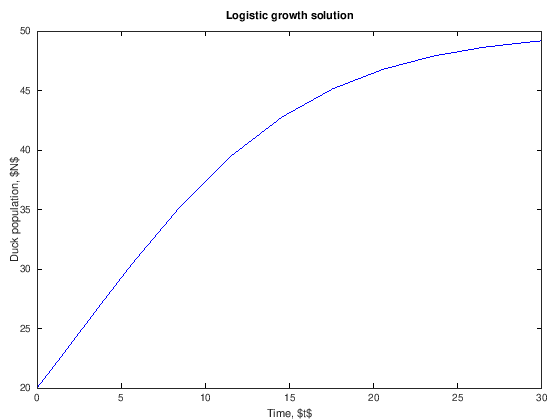

In [13]:

%the initial conditions and parameters of the equation
tRange = [0, 30];
init = 20;
r = 0.15;
K = 50;

%the function handle that we need - notice the dummy variable t
fun = @(t,N) log_growth(N,r,K);

[tVals, NVals] = ode45(fun, tRange, init);

figure;
plot(tVals, NVals, '-b');
xlabel('Time, $t$','interpreter','latex');
ylabel('Duck population, $N$','interpreter','latex')
title('Logistic growth solution','interpreter','latex')

Of course, now that you have a method of modelling the population, and a script which lets you change the values of the parameters, you can investigate what would happen if the growth rate was greater or smaller, if the lake was expanded to make room for more ducks, or if the population started out smaller or larger than the maximum capacity.

:+Solution

## Key Points:
- A script is a file which contains a sequence of commands we want to execute in the command line.
- A function is a file that contains a black-box proceedure that we want to perform on different variables, or multiple times, but don't want to write out the full proceedure each time in our script.
- A function handle is a variable that effectively stores a function - we can create them using the `@` symbol.